In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Parameters


In [2]:
t_step = 0.05
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 2500, t_step)
keep = int(t_last / t_step)
x = 0.5
y = 1
q = 1
p = 0
par = x,y,p,q
k = 0.05
gamma = 0.1
mu = 2
beta = 0.2
alpha = 0.1
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

## Solutions

In [3]:
xsol = lilie.x_solv()[:keep]
ysol = lilie.y_solv()[:keep]
psol = lilie.p_solv()[:keep]
qsol = lilie.q_solv()[:keep]


## Find Peaks

In [4]:
xmax = lilie.maximumofplot()[0]
ymax = lilie.maximumofplot()[1]
x_amplitude = lilie.find_peaks_max()[0]
y_amplitude = lilie.find_peaks_max()[1]

# Timeseries
showing the timeseries for Van der Pol Oscillator and Duffing oscillator with the Maximum peak of the Plot.

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.10, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 0.00, q$_0$ = 1.00


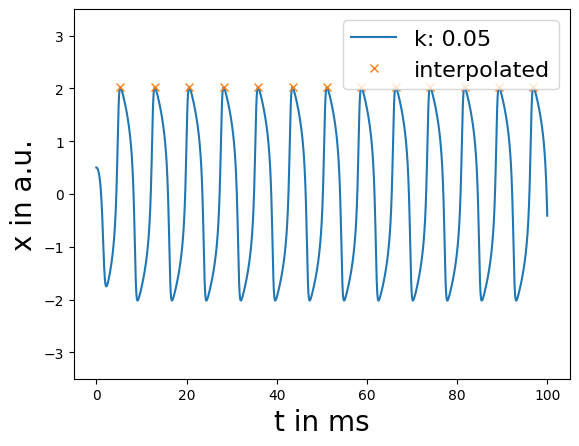

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.10, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 0.00, q$_0$ = 1.00


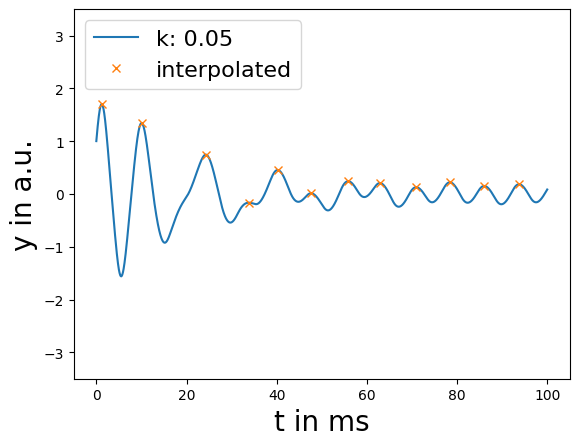

In [5]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "interpolated")
# plt.plot([np.arange(0, t_last, t_step)[i] for i in x_amplitude[0]], x_amplitude[1]['peak_heights'], "x", label = "max peak")

plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot([np.arange(0, t_last, t_step)[i] for i in y_amplitude[0]], y_amplitude[1]['peak_heights'], "x", label = "interpolated")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

## Quadratic Interpolation

In [6]:
tx_plus = lilie.square_interpolation()[1][0]
ty_plus = lilie.square_interpolation()[1][1]
xing = lilie.square_interpolation()[0][0]
ying = lilie.square_interpolation()[0][1]

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:231: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


In [7]:
xing, x_amplitude[1]['peak_heights']

([np.float64(2.0193684134330745),
  np.float64(2.019936744593025),
  np.float64(2.0198378326595616),
  np.float64(2.019979525648978),
  np.float64(2.019883315798097),
  np.float64(2.0198073279461823),
  np.float64(2.019933577966185),
  np.float64(2.0198352569464078),
  np.float64(2.019977191075668),
  np.float64(2.019880100656337),
  np.float64(2.019806377193163),
  np.float64(2.0199304113466496),
  np.float64(2.019832819865769)],
 array([2.01902092, 2.01983312, 2.01973537, 2.01957867, 2.01988323,
        2.01938283, 2.01984248, 2.01971953, 2.01960139, 2.01987925,
        2.01935526, 2.01985103, 2.01970302]))

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.10, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 0.00, q$_0$ = 1.00


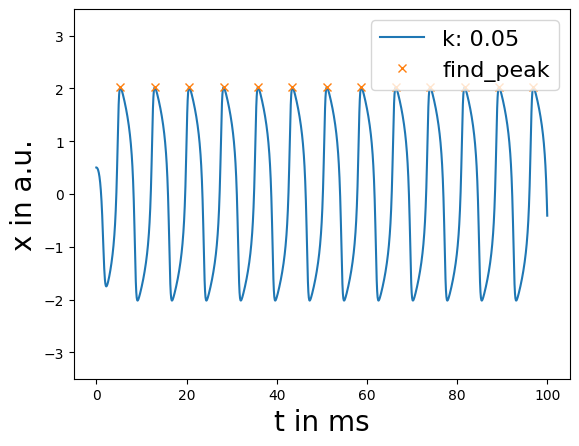

$\gamma$ = 0.10, ß = 0.20, $\alpha$ = 0.10, $\mu$ = 2.00, x$_0$ = 0.50, y$_0$ = 1.00, p$_0$ = 0.00, q$_0$ = 1.00


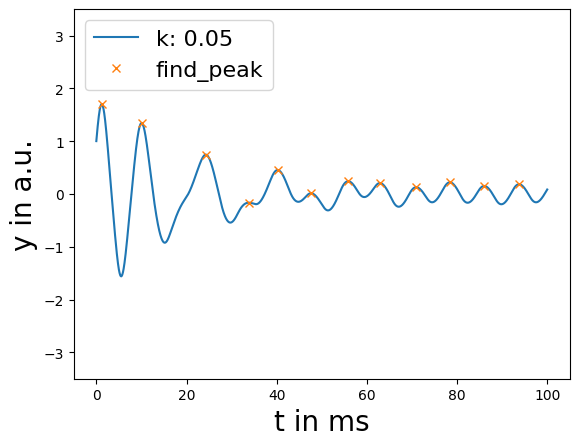

In [8]:
# x-timeseries
plt.plot(np.arange(0, t_last, t_step), xsol, label = f"k: {k:.2f}")
plt.plot(tx_plus, xing, "x", label = "find_peak")
plt.ylabel("x in a.u.", fontsize = 20)
x_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("t in ms", fontsize = 20)

plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(x_title)
plt.show()

# y-timeseries
plt.plot(np.arange(0, t_last, t_step), ysol, label = f"k: {k:.2f}")
plt.plot(ty_plus, ying, "x", label = "find_peak")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.ylim([-3.5, 3.5])
# plt.figtext(0.99, 0.01, title,
#         horizontalalignment="right",
#         fontsize = 16)
print(y_title)
plt.show()

# Resonance Curve

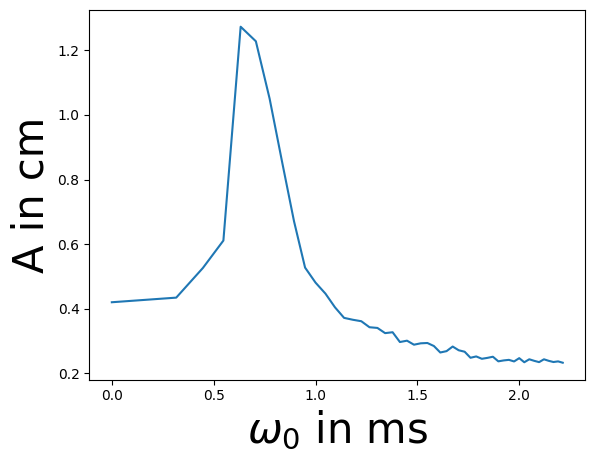

In [9]:
# findpeaks
reso_alpha = np.arange(0, 5, 0.1)
amp = [np.mean(OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).find_peaks_max()[1][1]['peak_heights']) for i in reso_alpha]
omega = [np.sqrt(i) for i in reso_alpha]
plt.plot(omega, amp)
plt.xlabel("$\omega _0$ in ms", fontsize = 30)
plt.ylabel("A in cm",fontsize = 30)
plt.show()

/Users/huyenanh/git_repos/daniel_model/ODE/onesidedcoupling.py:231: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(quadraticinterpolation, t[i][u], sol[i][u])


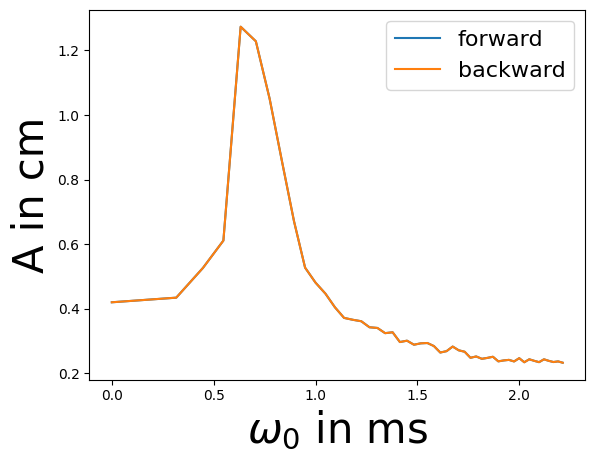

In [15]:
# interpolated peaks
reso_alpha = np.arange(0, 5, 0.1)
amp = []
for i in reso_alpha:
    try:
        interpolated = OnesidedCoupling(par, t, keep, k, mu, gamma, i, beta).square_interpolation()[0][1]
        mean = np.mean(interpolated)
        amp.append(mean)
    except:
        print("hm")

revers_amp = []
for u in reversed(reso_alpha):
    try:
        interpolated = OnesidedCoupling(par, t, keep, k, mu, gamma, u, beta).square_interpolation()[0][1]
        mean = np.mean(interpolated)
        revers_amp.append(mean)
    except:
        print("hm")

omega = [np.sqrt(i) for i in reso_alpha]
plt.plot(omega, amp, label = "forward")
plt.plot(omega[::-1], revers_amp, label = "backward")
plt.legend(fontsize = 16, loc = "upper right")
plt.xlabel("$\omega _0$ in ms", fontsize = 30)
plt.ylabel("A in cm",fontsize = 30)
plt.show()

# Randomstuff

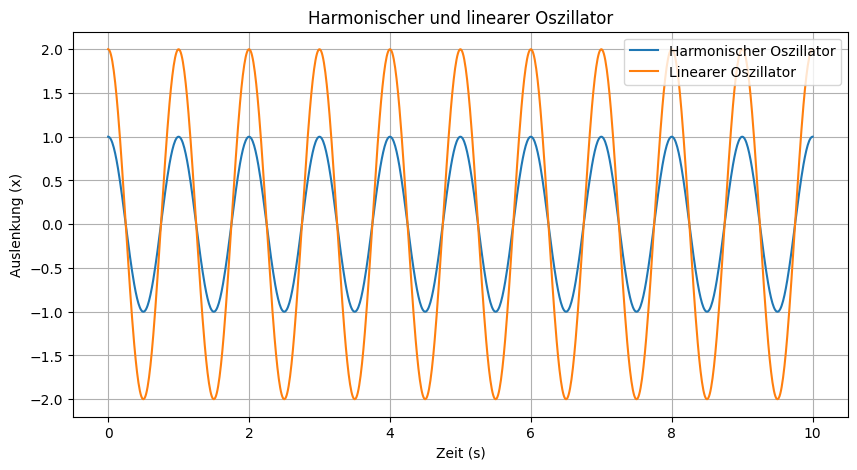

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter festlegen
A = 1  # Amplitude
omega = 2 * np.pi  # Kreisfrequenz (z.B. 1 Hz)
phi = 0  # Phasenverschiebung

# Zeitarray erstellen
t = np.linspace(0, 10, 1000)  # 2 Sekunden, 1000 Punkte

# Harmonischer Oszillator
x_harmonic = A * np.cos(omega * t + phi)

# Linearer Oszillator (z.B. Schwingungsgleichung)
A_lin = 2
x_linear = A_lin * np.exp(0 * omega * t) * np.cos(omega * t + phi)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(t, x_harmonic, label='Harmonischer Oszillator')
plt.plot(t, x_linear, label='Linearer Oszillator')
plt.xlabel('Zeit (s)')
plt.ylabel('Auslenkung (x)')
plt.title('Harmonischer und linearer Oszillator')
plt.legend()
plt.grid(True)
plt.show()
